In [1006]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats

## Salary: Associate vs Bachelor Degree: 'college_salary_bystate.csv'

### Game Plan

- Boxplot of Early/Mid career salary per degree type (bachelors vs associates)
    - Independent T-Tests
        - To determine differences between early/mid salary, per bach and ass degrees
        - To determine differences between bach/ass early salary and mid salary


- Scatterplot of bachelors early and mid career salary vs. %stem
    - Pearson Correlation Test
        - To identify significant relationships between post-bachelor salary and college with %study body in STEM
        - Associate degrees were excluded because nearly all had no stem majors

In [1093]:
#Import data
salary_df = pd.read_csv('college_salary_bystate.csv')

**Read csv, inspect descriptive stats, and calculate percent difference**

In [1094]:
#Group by degree_type
deg_group_df = salary_df.groupby( 'degree_type' )
colFun = {'degree_type':['count'],
          'early_salary': ['mean', 'std', 'min', 'max'], 
          'mid_salary': ['mean', 'std', 'min', 'max'],
          'per_stem': ['mean', 'std', 'min', 'max']}
analysis_df = deg_group_df.agg( colFun ).round(decimals=1).T

#Calculate percent difference between degree types
    #Only interested in percent difference in mean early/mid salaries
a = analysis_df['associates']
b = analysis_df['bachelors']
analysis_df['percent_diff']= 2*(b-a)/(b+a) * 100

analysis_df

degree_type         associates  bachelors  percent_diff
degree_type  count      1313.0     1553.0     16.748081
early_salary mean      41438.8    49220.6     17.167111
             std        4489.5     7834.1     54.279594
             min       29200.0    28400.0     -2.777778
             max       69400.0    91200.0     27.148194
mid_salary   mean      61167.6    88713.5     36.757003
             std        6047.2    14842.0     84.204278
             min       40800.0    52000.0     24.137931
             max       90600.0   158200.0     54.340836
per_stem     mean          6.6       13.7     69.950739
             std           7.8       13.7     54.883721
             min           0.0        0.0           NaN
             max          90.0      100.0     10.526316

**Reformat df for Bachelor/Associate graphing and statistical analyses**

In [980]:
#salary_df currently has separate early and mid salary columns, must condense and label column

#Combine salary and create salary_label
salary_combined_df = pd.concat([salary_df['early_salary'], salary_df['mid_salary']], axis=0)
salary_combined_label = ['Early Career']*len(salary_df['early_salary']) + ['Mid Career']*len(salary_df['mid_salary'])

#Double data_df, and add salary label and data
salary_formated_df = pd.concat([salary_df, salary_df], axis=0)
salary_formated_df['degree_type'] = salary_formated_df['degree_type'].str.title()
salary_formated_df['salary_label'] = salary_combined_label
salary_formated_df['salary'] = salary_combined_df

#Drop early and mid salary columns
salary_formated_df.drop('mid_salary',1, inplace=True)
salary_formated_df.drop('early_salary',1, inplace=True)

# #Check to see df
# salary_formated_df.sample(5)


state_name degree_type                       college_name  per_stem  \
1784      New York  Associates           Monroe Community College         6   
2289  Pennsylvania  Associates   Luzerne County Community College         5   
2398     Tennessee   Bachelors      Southern Adventist University         9   
2509         Texas   Bachelors  Southwestern Adventist University        13   
1561    New Jersey  Associates           Saint Peter's University        14   

      salary_label  salary  
1784    Mid Career   58300  
2289  Early Career   39400  
2398  Early Career   47500  
2509    Mid Career   77600  
1561  Early Career   43500

**Plot salary per degree type**

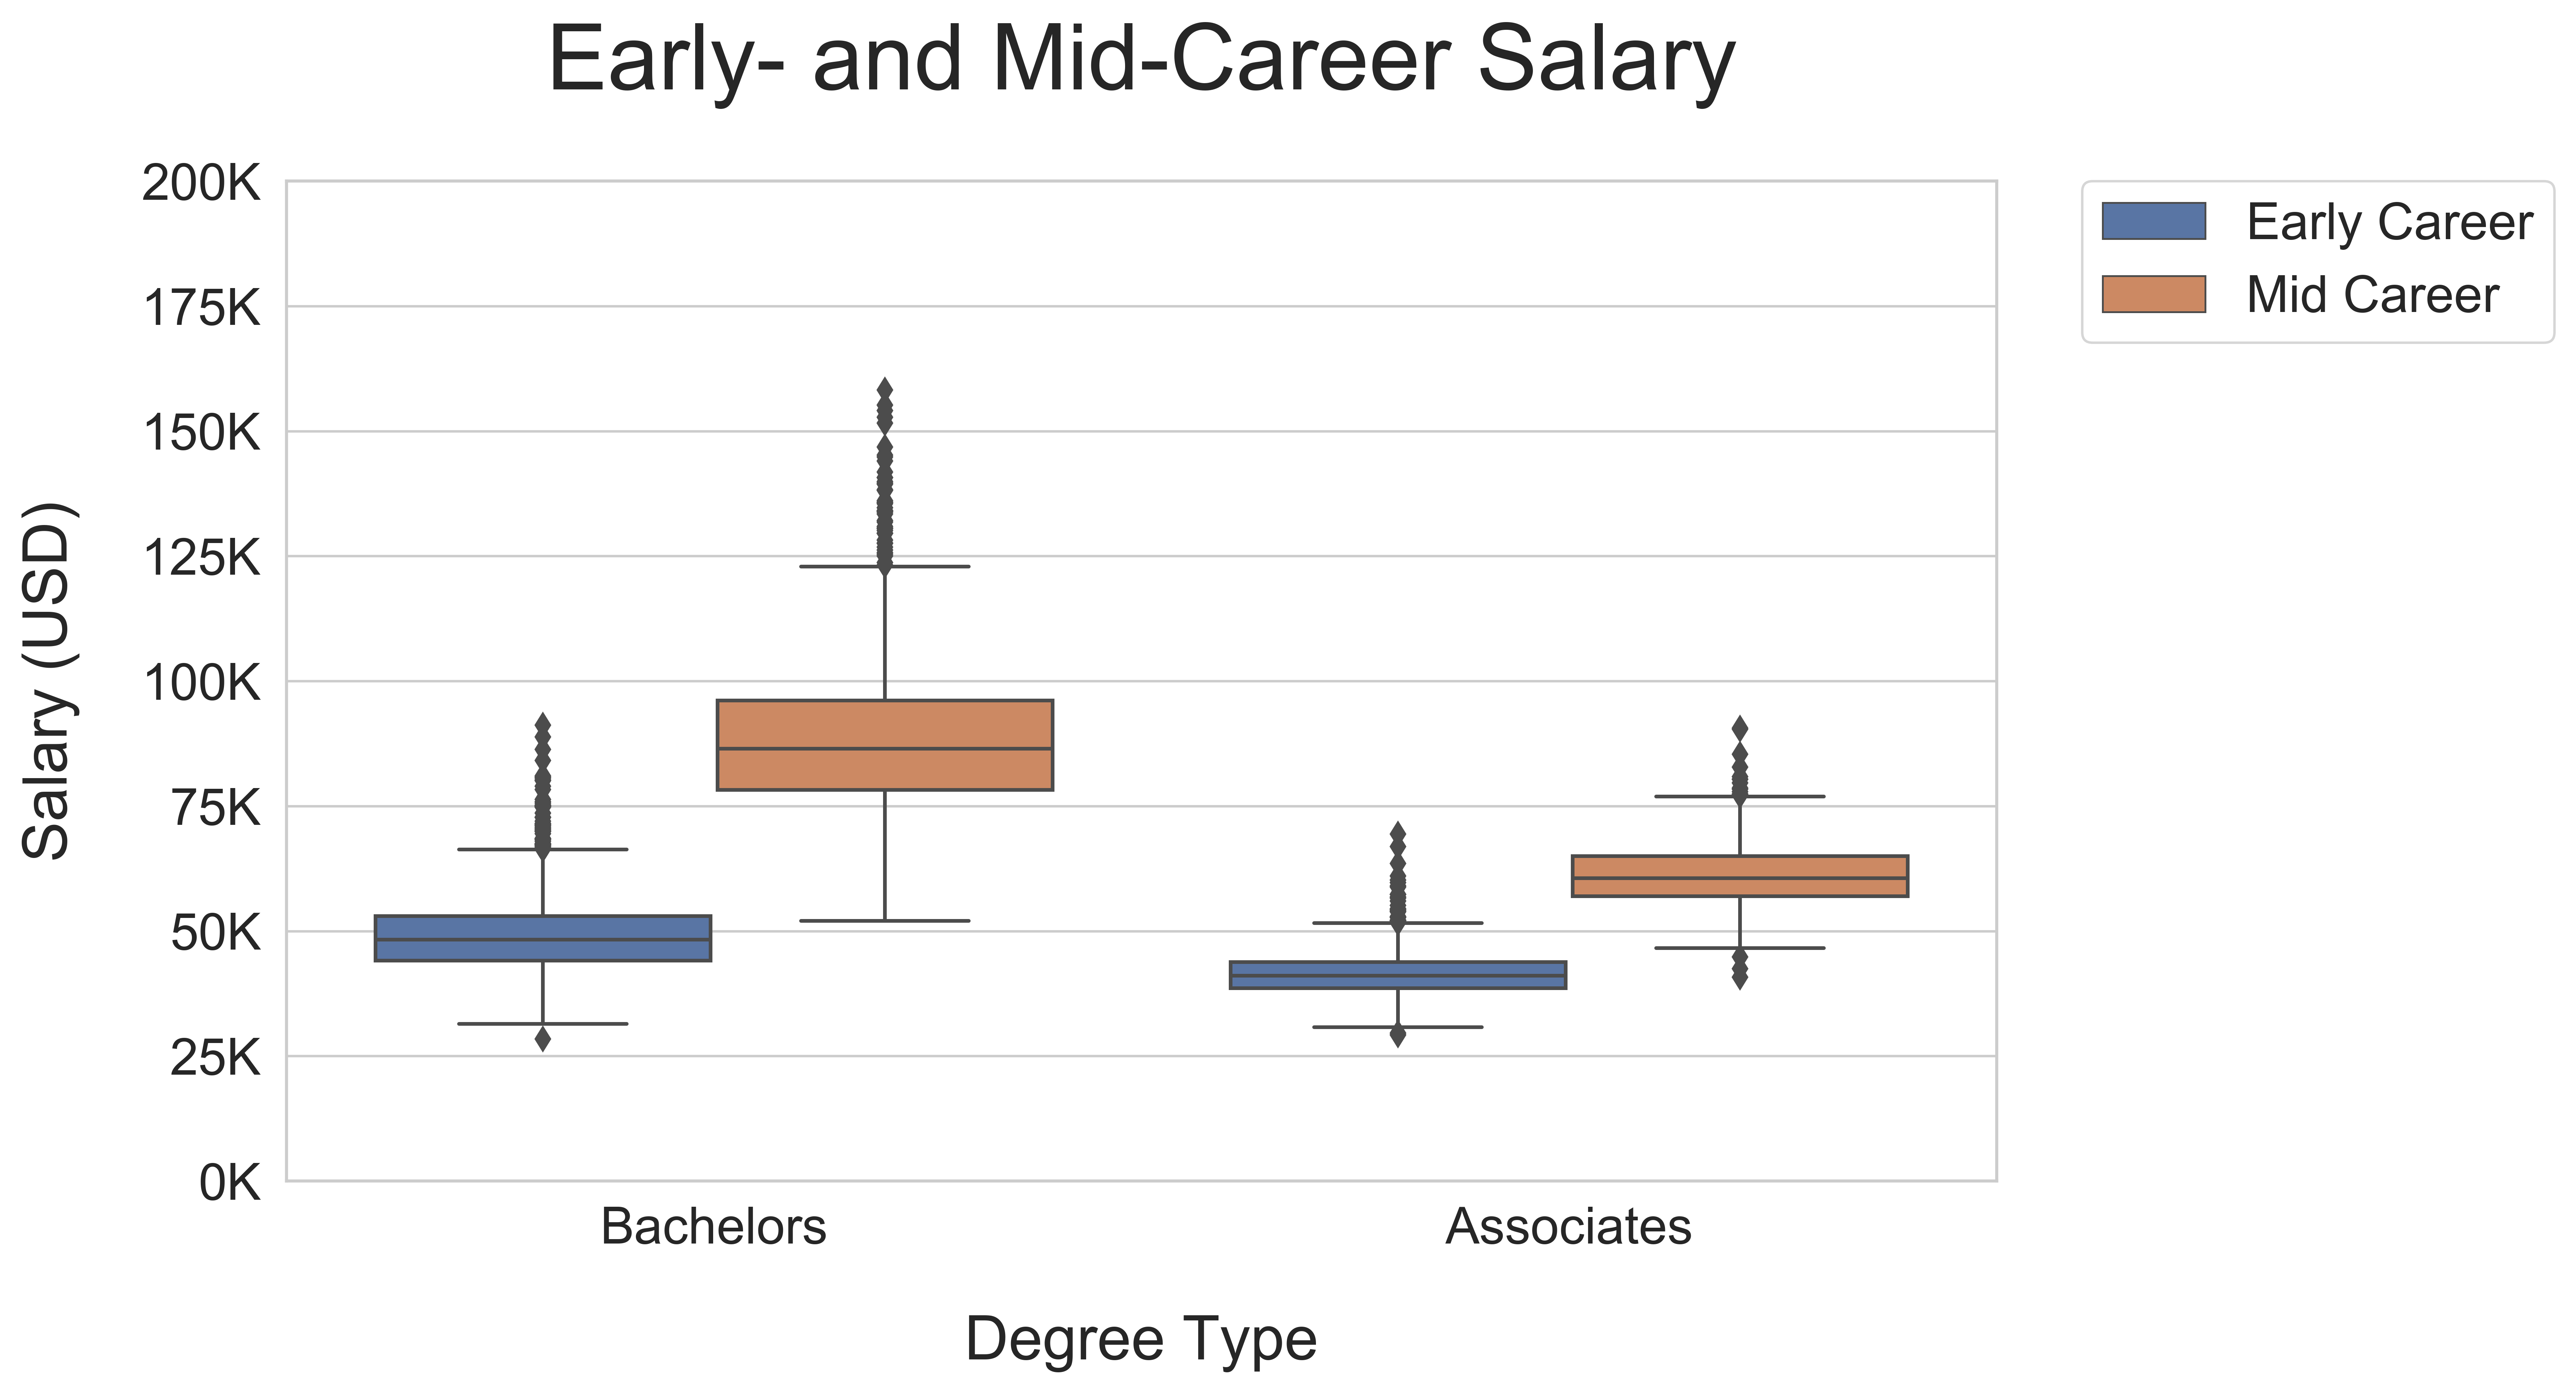

In [1095]:
#Setup Plot Figure
plt.rcParams['figure.figsize']=(10,6) #fig size
plt.rcParams['figure.dpi'] = 600 #fig dpi
text_scaling=1.9 #plot text size
sns.set(style="whitegrid") #remove shading of plot
sns.set_context("paper", font_scale=text_scaling) 

#Plot data
ax = sns.boxplot(x='degree_type', y='salary', hue='salary_label', data=salary_formated_df)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend outside
ax.set_xlabel('Degree Type', fontsize = 20, labelpad=20)
ax.set_ylabel('Salary (USD)', fontsize = 20, labelpad=20)
ax.set_title('Early- and Mid-Career Salary', fontsize = 30, pad = 30)
ax.set(ylim=(0, 200000)) #change to even number
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K')) #change ticker

#Save plot
plt.savefig('images/bachass_earlymid_salary.tiff', bbox_inches = 'tight', pad_inches=.5)

**Independent T-Tests: Box Plot Comparisons**

In [1096]:
#Isolate variables for statistical analyses
ass_early = salary_formated_df['salary'].loc[(salary_formated_df['degree_type'] == 'Associates') & (salary_formated_df['salary_label'] == 'Early Career')]
ass_mid = salary_formated_df['salary'].loc[(salary_formated_df['degree_type'] == 'Associates') & (salary_formated_df['salary_label'] == 'Mid Career')]
bach_early = salary_formated_df['salary'].loc[(salary_formated_df['degree_type'] == 'Bachelors') & (salary_formated_df['salary_label'] == 'Early Career')]
bach_mid = salary_formated_df['salary'].loc[(salary_formated_df['degree_type'] == 'Bachelors') & (salary_formated_df['salary_label'] == 'Mid Career')] 
    
#Perform statistical analysis
assbach_early = stats.ttest_ind(bach_early, ass_early)
assbach_mid = stats.ttest_ind(bach_mid, ass_mid)
bach_earlymid = stats.ttest_ind(bach_early, bach_mid)
ass_earlymid = stats.ttest_ind(ass_early, ass_mid)

#View results
print(assbach_early)
print(assbach_mid)
print(bach_earlymid)
print(assbach_mid)

Ttest_indResult(statistic=31.84289138808005, pvalue=9.292051187940504e-191)
Ttest_indResult(statistic=62.97531848388665, pvalue=0.0)
Ttest_indResult(statistic=-92.73516330877766, pvalue=0.0)
Ttest_indResult(statistic=62.97531848388665, pvalue=0.0)


**Plot salary as a function of percent of STEM degrees**

Website additional provides % of student body that are majoring in STEM
- Associate degrees were excluded from analysis because few had STEM programs

<Figure size 6000x3600 with 0 Axes>

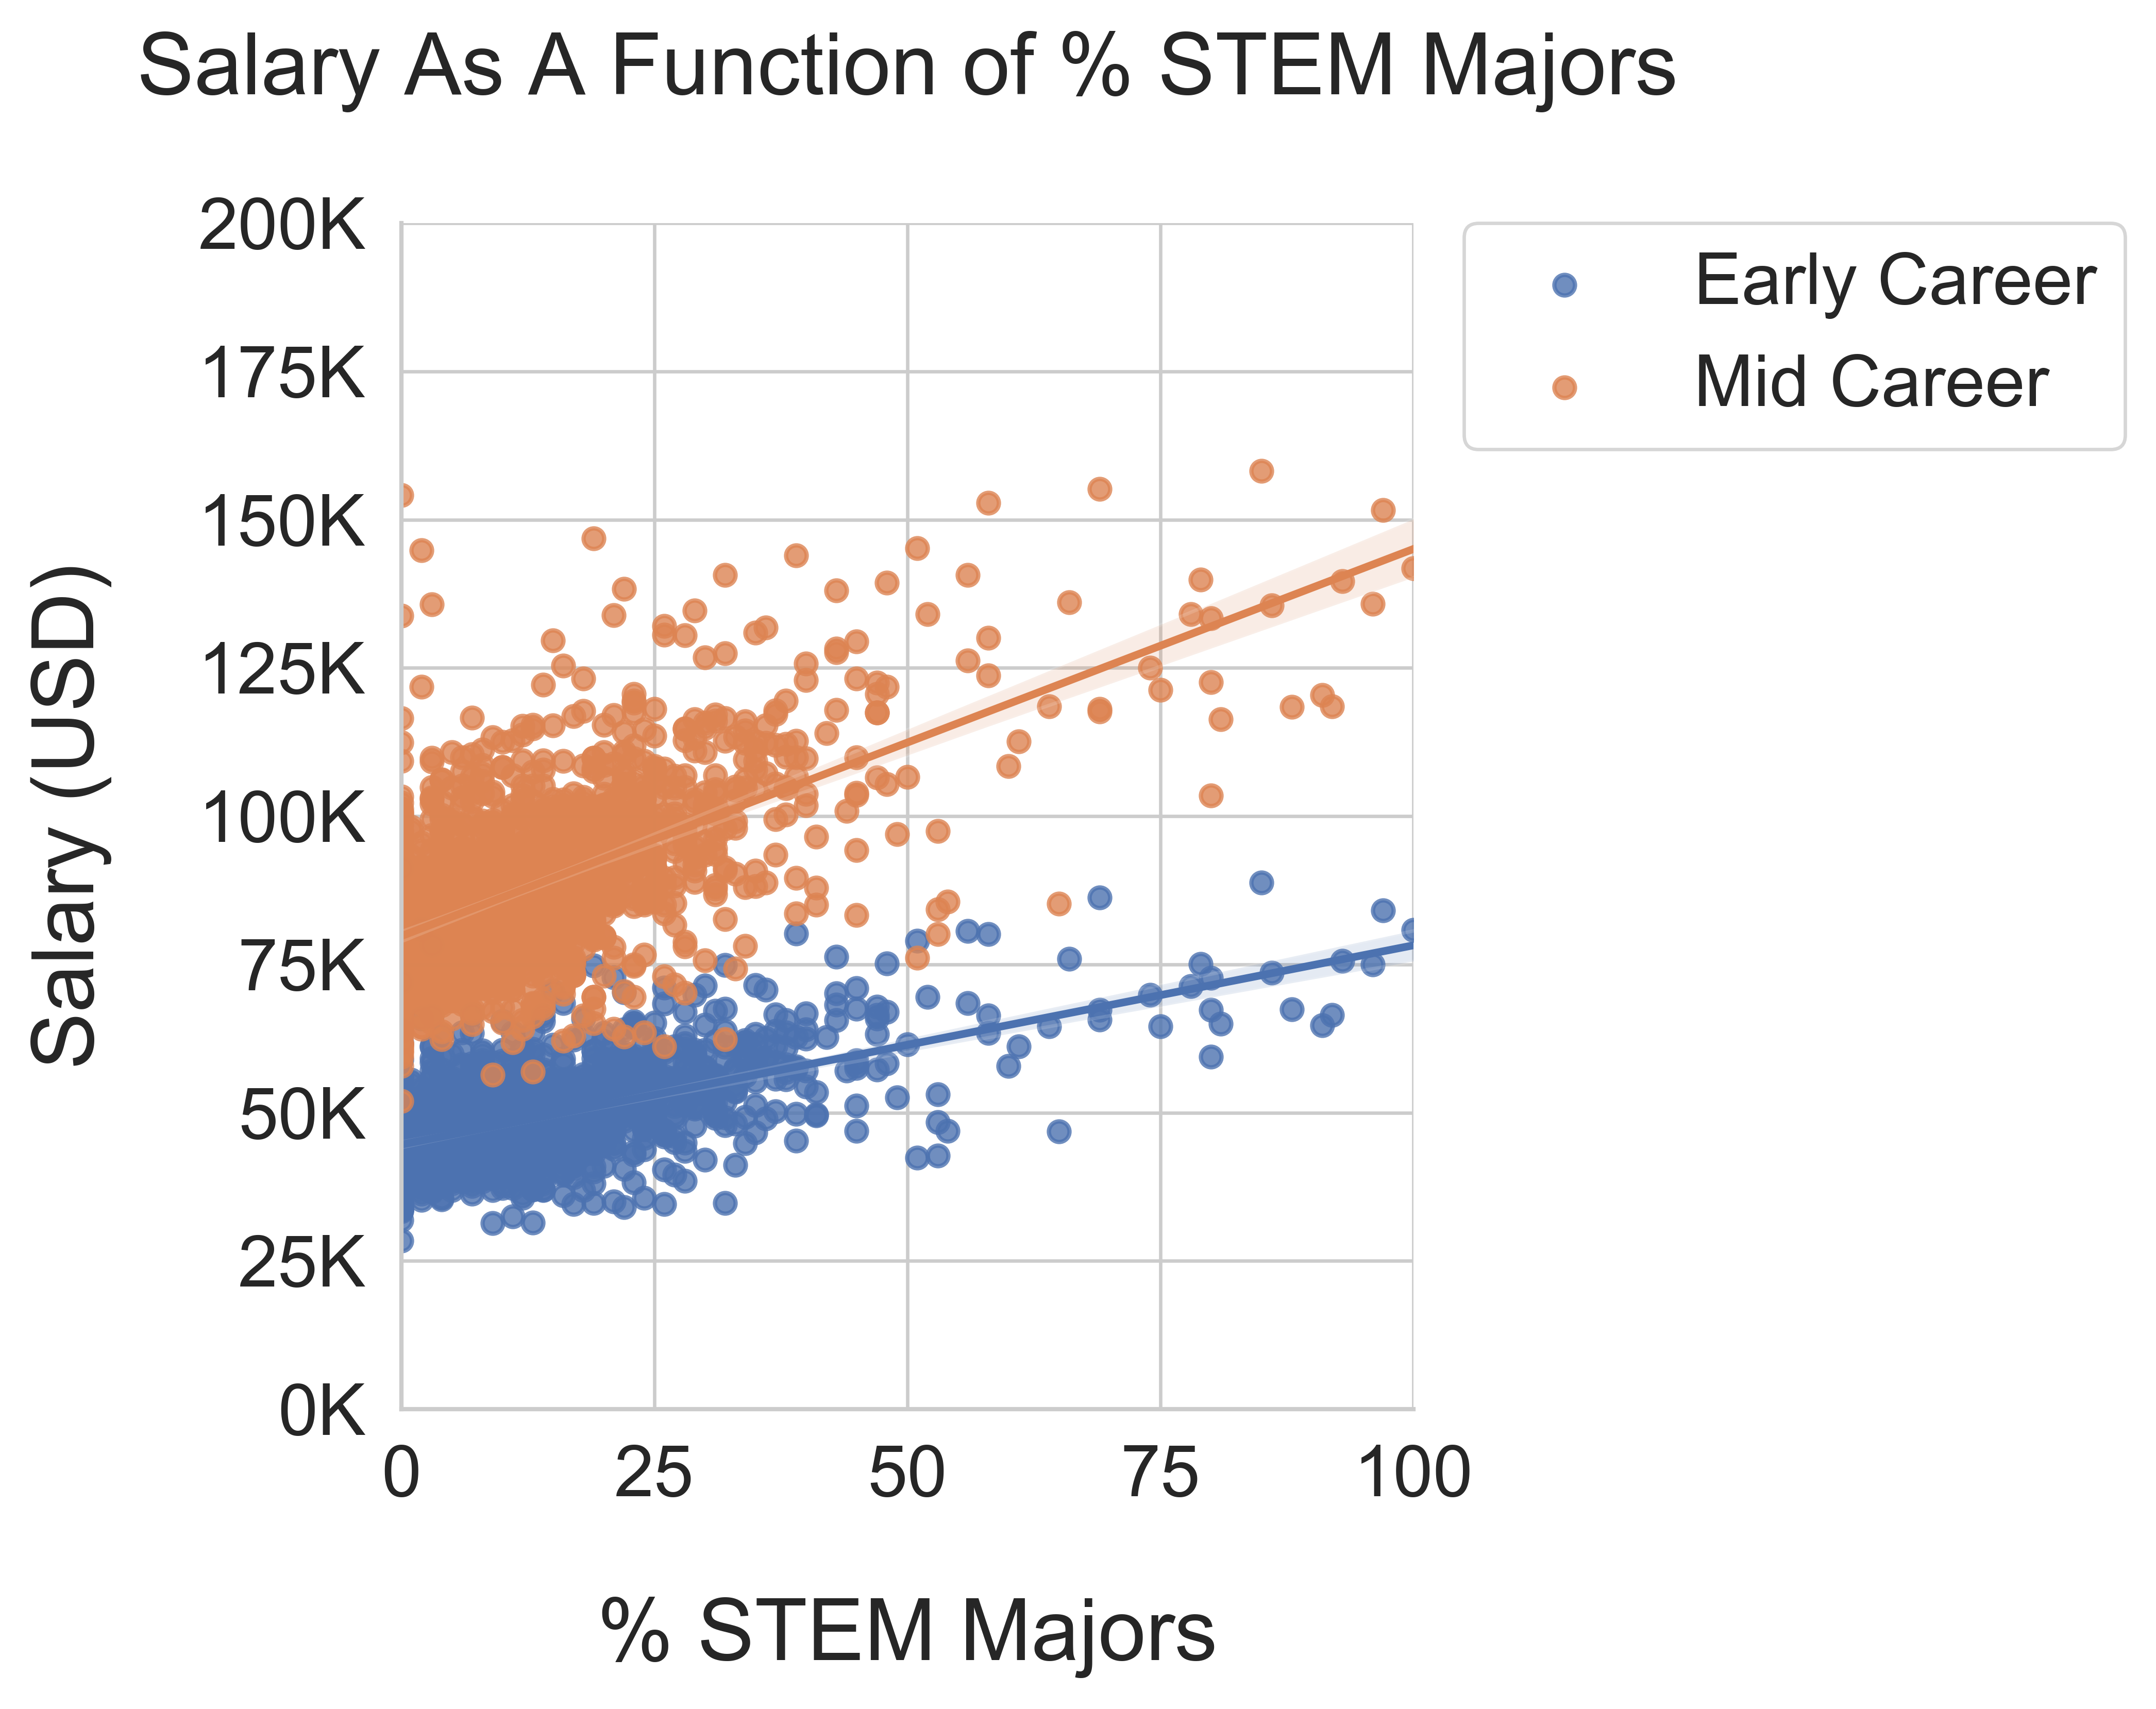

In [1097]:
#Remove associate degree data
data = salary_formated_df[ salary_formated_df['degree_type'] == 'Bachelors']

#Set Figure Parameters
plt.figure(figsize=(10,6))
text_scaling=1.9 #plot text size
sns.set(style="whitegrid") #remove shading of plot
sns.set_context("paper", font_scale=text_scaling) 

#Plot data
ax = sns.lmplot(x = "per_stem", y = "salary", data = data, hue="salary_label", legend_out=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabels('% STEM Majors', fontsize = 20, labelpad=20)
ax.set_ylabels('Salary (USD)', fontsize = 20, labelpad=20)
plt.title("Salary As A Function of % STEM Majors", fontsize = 20, pad = 30) 
ax.set(ylim=(0, 200000), xlim=(0,100))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K')) #change ticker

#Save plot
plt.savefig('images/salary_percstem.tiff', bbox_inches = 'tight', pad_inches=.5)

**Pearson Correlation: Compare %STEM and Salary Per Career Stage**

In [1080]:
from scipy.stats import pearsonr


early_corr, early_pval = pearsonr(data.per_stem[ data['salary_label']=='Early Career'], \
                         data.salary[ data['salary_label']=='Early Career'])

mid_corr, mid_pval = pearsonr(data.per_stem[ data['salary_label']=='Mid Career'], \
                         data.salary[ data['salary_label']=='Mid Career'])



print(early_corr, early_pval)
print(mid_corr, mid_pval)

0.5869792037457483 1.847685251316643e-144
0.6018616956960571 1.0955057131397722e-153


## ROI By State: 'college_salary_bystate.csv'

### Game Plan

- ROI histogram of private and public colleges, with and without aid
    - No statistics
    - Inspect number of colleges with negative ROI
    
- ROI State Heatmap
    - Heatmap includes %difference between private and public ROI
    - Independent T-tests
        - To determine diferences between private and public college ROI, per state
        - States with fewer than 5 public and private colleges were excluded from statistical analyses
        


**Reformat data for histogram plot**

In [1110]:
#Import data
roi_df = pd.read_csv('college_roi_bystate.csv', na_values=['N/A', np.nan])

#Remove service academies from data
idx = roi_df[ roi_df['college_type'] == 'service academy'].index
roi_df.drop(idx, inplace=True)

#Remove out of state datapoints
idx = roi_df[ roi_df['college_type'] == 'outofstate'].index
roi_df.drop(idx, inplace=True)

#Change instate to Public
roi_df['college_type'][ roi_df['college_type'] == 'instate'] = 'Public'
roi_df['college_type'] = roi_df['college_type'].str.title()

#Change financial aid text
roi_df['financial_aid'][ roi_df['financial_aid'] == 1] = 'With Financial Aid'
roi_df['financial_aid'][ roi_df['financial_aid'] == 0] = 'Without Financial Aid'

#Remove additional labels from college_name
roi_df['college_name'] = roi_df['college_name'].apply(\
                            lambda x: x.replace("(Private)", "").replace("(In-State)", ""))

#Remove colleges without ROI data
idx = roi_df[roi_df['roi'].isna()].index
roi_df.drop(idx, inplace=True)
idx = roi_df[roi_df['financial_aid'].isna()].index
roi_df.drop(idx, inplace=True)


#Convert ROI from str to integer
roi_df['roi'] = roi_df['roi'].apply(lambda x: int(x))

#Change Column Names
roi_df.columns = ['state_name', 'college_name', 'college_type', 'ROI', 'total_cost',
       'grad_rate', 'yrs2grad', 'financial_aid', 'loan_amt', 'perc_grant']



/Users/jonathanharris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jonathanharris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Plot histogram of ROI with and without financial aid**

[[11.262798634812286], [2.028397565922921], [4.6643913538111486], [0.6085192697768762]]


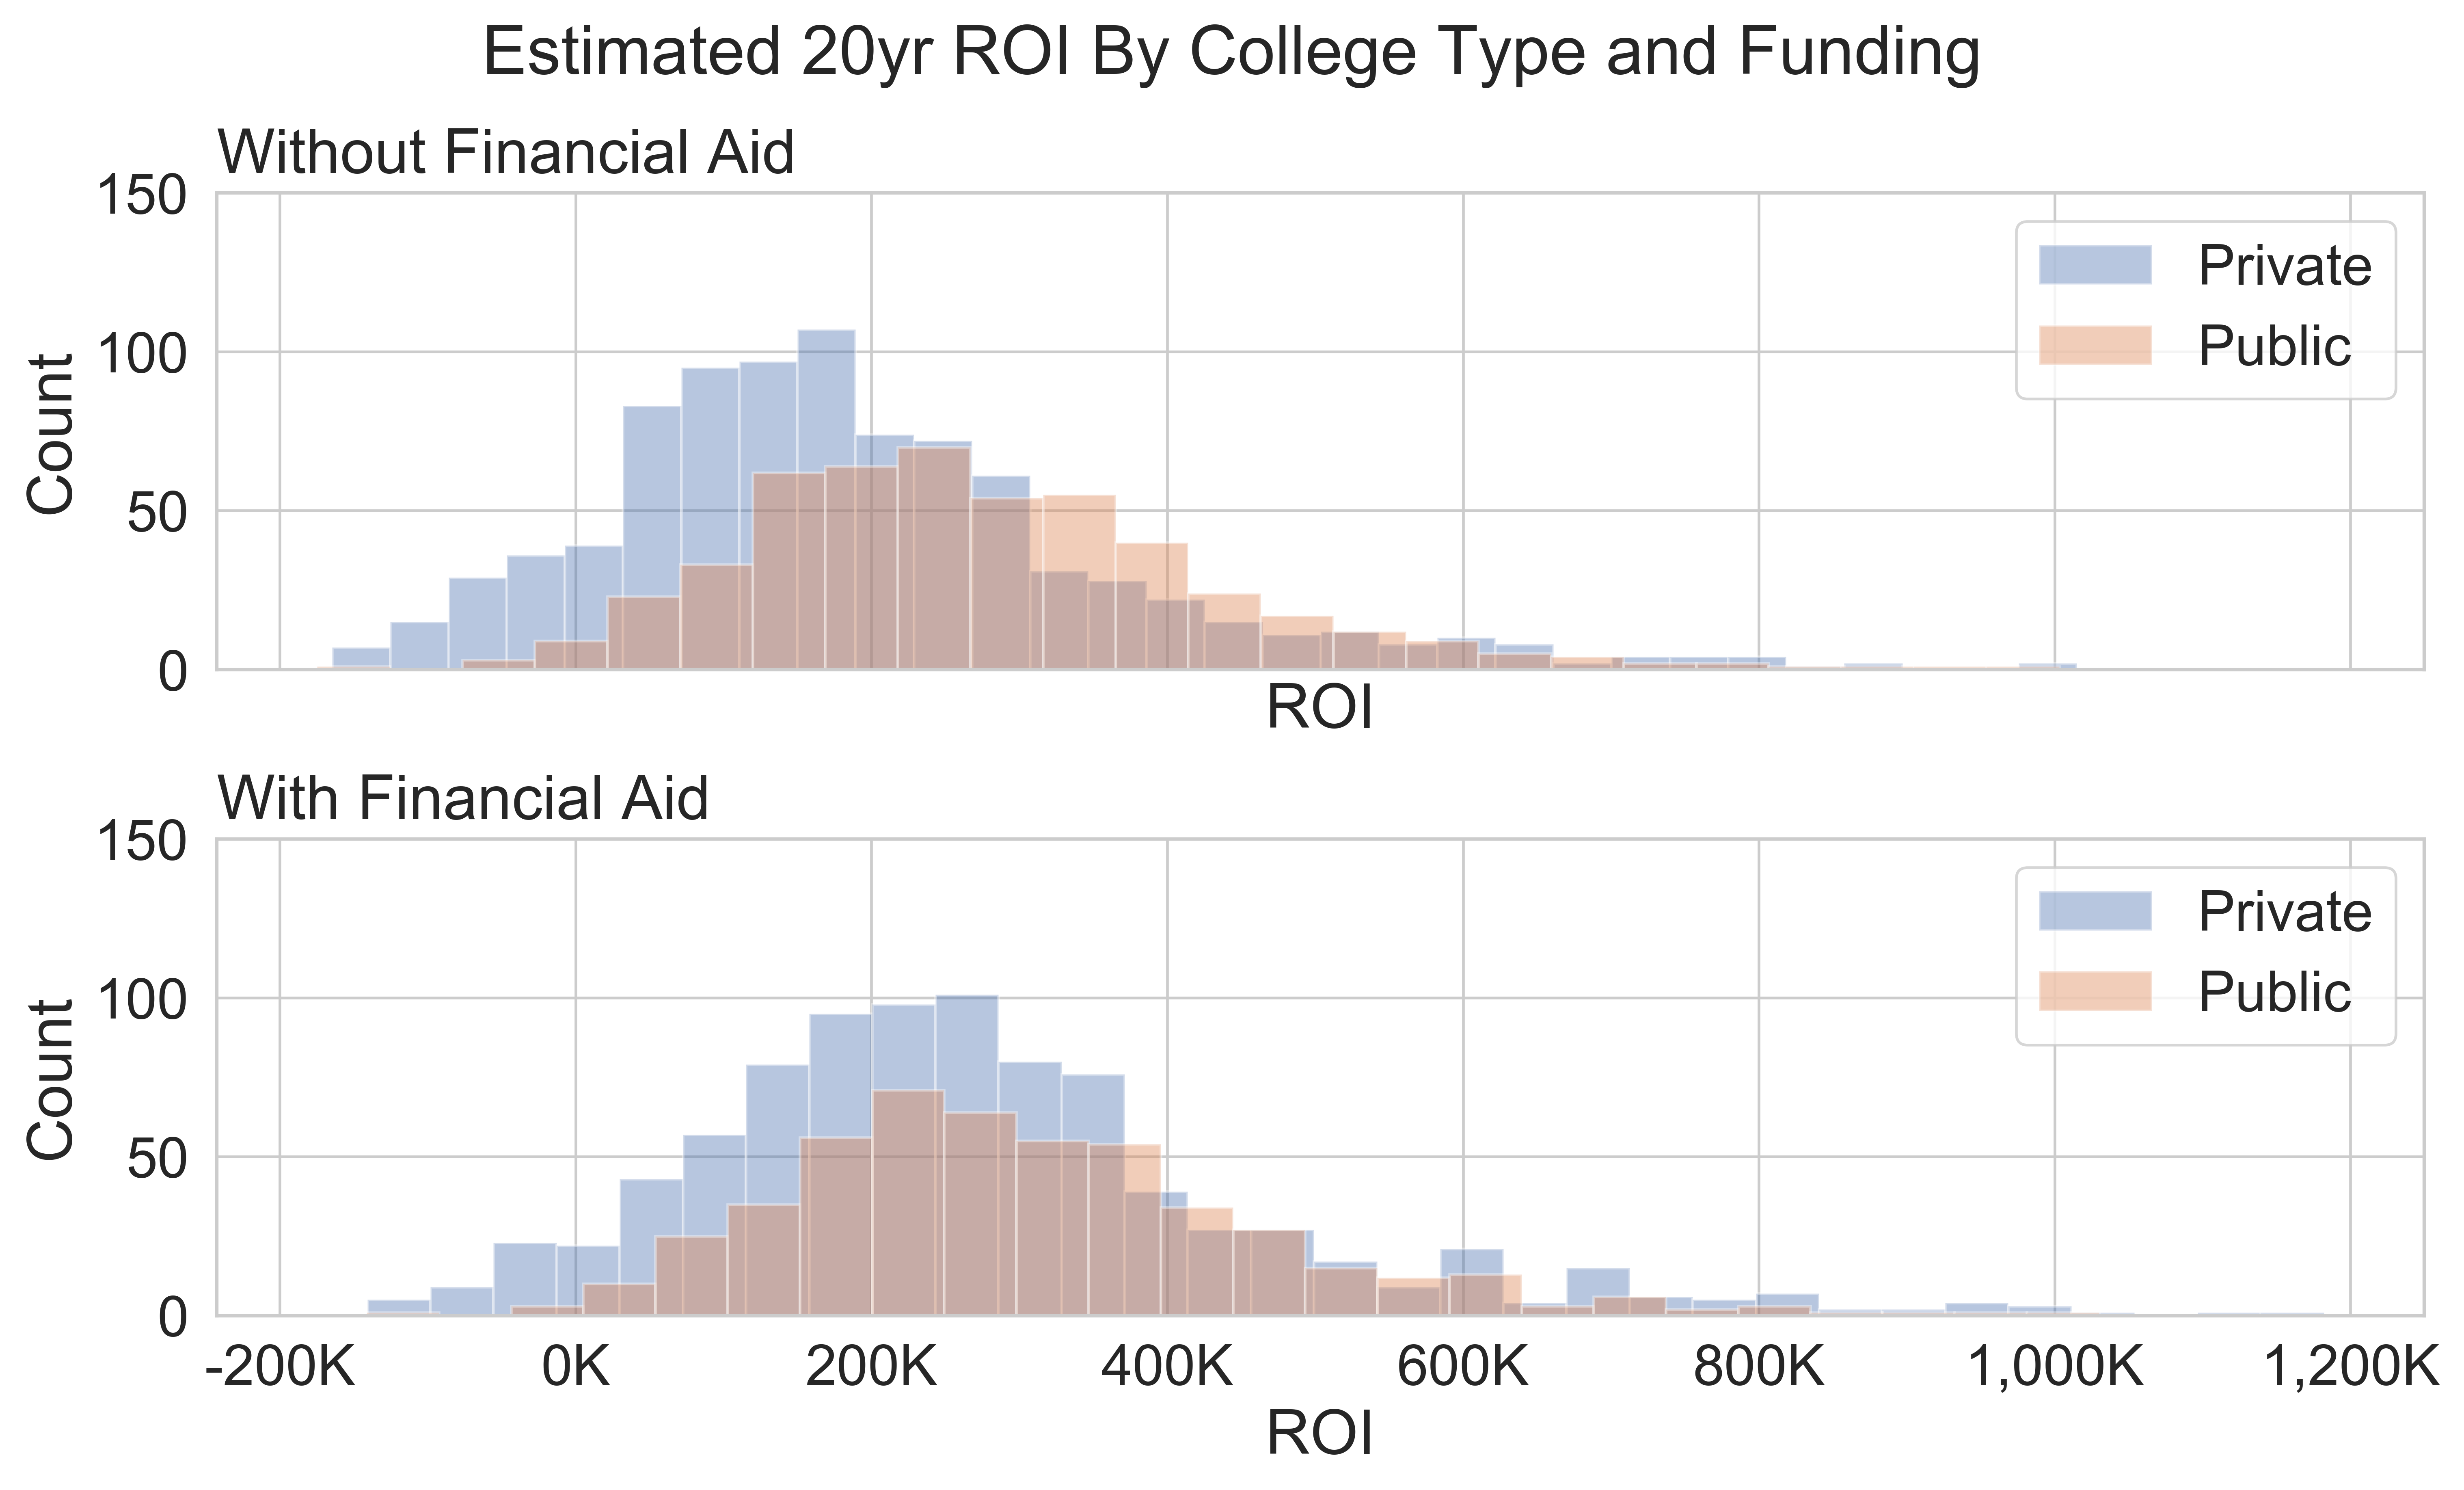

In [1116]:
#Separate variables
private_wo_df = roi_df[ (roi_df['college_type'] == 'Private') & (roi_df['financial_aid'] == 'Without Financial Aid')]
public_wo_df = roi_df[ (roi_df['college_type'] == 'Public') & (roi_df['financial_aid'] == 'Without Financial Aid')]
private_w_df = roi_df[ (roi_df['college_type'] == 'Private') & (roi_df['financial_aid'] == 'With Financial Aid')]
public_w_df = roi_df[ (roi_df['college_type'] == 'Public') & (roi_df['financial_aid'] == 'With Financial Aid')]

#Count of Negative ROI
neg_private_wo = private_wo_df['ROI'].loc[private_wo_df['ROI'] <= 0].count()
neg_public_wo = public_wo_df['ROI'].loc[public_wo_df['ROI'] <= 0].count()
neg_private_w = private_w_df['ROI'].loc[private_w_df['ROI'] <= 0].count()
neg_public_w = public_w_df['ROI'].loc[public_w_df['ROI'] <= 0].count()

count_list = [[neg_private_wo/private_wo_df.college_name.count()*100],
              [neg_public_wo/public_wo_df.college_name.count()*100],
              [neg_private_w/private_w_df.college_name.count()*100],
              [neg_public_w/public_w_df.college_name.count()*100]]
print(count_list)

#Plot Data
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, constrained_layout=True)
sns.distplot( private_wo_df['ROI'], kde = False, ax=ax1, label='Private')
sns.distplot( public_wo_df['ROI'], kde = False,  ax=ax1, label='Public')
sns.distplot( private_w_df['ROI'], kde = False, ax=ax2, label='Private')
sns.distplot( public_w_df['ROI'], kde = False,  ax=ax2, label='Public')

#Format plot
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi'] = 600
fig.suptitle('Estimated 20yr ROI By College Type and Funding', fontsize=20)
ax1.set_title('Without Financial Aid', loc='left')
ax2.set_title('With Financial Aid', loc='left')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
ax1.legend(["Private", 'Public'],loc="upper right")
ax2.legend(["Private", 'Public'],loc="upper right")
ax1.set(ylim=(0, 150))
ax2.set(ylim=(0, 150))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K')) #change ticker


plt.savefig('images/ROI_histogram.tiff', bbox_inches = 'tight', pad_inches=.5)


**Format df for heatmap**

In [1101]:
#Create copy
state_df = roi_df.copy()

#Remove data from colleges without financial aid
idx = state_df[ state_df['financial_aid'] == 'Without Financial Aid'].index
state_df.drop(idx, inplace=True)

#Convert state_name to abbreviation (necessary for map plots)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennesse': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
state_df['abbr'] = state_df['state_name'].apply(lambda x: us_state_abbrev.get(x.title(), 'WDC'))

#Format plot to calculate percent difference
format_df =  state_df.groupby(['abbr','college_type']).mean().reset_index()
df1 = format_df[['abbr','college_type','ROI','total_cost']].loc[ format_df['college_type'] == 'Private']
df1.columns = ['abbr','college_type', 'private_ROI', 'private_cost']
df2 = format_df[['abbr','college_type','ROI','total_cost']].loc[ format_df['college_type'] == 'Public']
df2.columns = ['abbr','college_type', 'public_ROI', 'public_cost']

#Trim the merged df
plot_df = pd.merge(df1[['abbr', 'private_ROI','private_cost']], df2[['abbr', 'public_ROI','public_cost']], how='outer', on ='abbr')
plot_df['percdiff_ROI'] = 2*(plot_df['private_ROI']-plot_df["public_ROI"])/(plot_df["private_ROI"]+plot_df["public_ROI"]) * 100
plot_df['percdiff_cost'] = 2*(plot_df['private_cost']-plot_df["public_cost"])/(plot_df['private_cost']+plot_df["public_cost"]) * 100

# #View data
# pd.set_option('display.max_rows', 500)
# plot_df


**Plot Heatmap of %Difference ROI Per State**

In [1102]:
import plotly.express as px  # Be sure to import express
from IPython.display import Image

fig
fig = px.choropleth(plot_df,  # Input Pandas DataFrame
                    locations="abbr",  # DataFrame column with locations
                    color="percdiff_ROI",  # DataFrame column with color values
                    hover_name="abbr", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
                    
fig.update_layout(
    title_text = 'Percent Difference Between Private and Public College ROI', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
    width=2000, height=1200,
    font=dict(
        family="Courier New, monospace",
        size=30))



fig.show()

import os

if not os.path.exists("images"):
    os.mkdir("images")
    
fig.write_image("images/state_ROI_heatmap.tiff")


ValueError: 
Invalid value of type <class 'str'> receive as an image format specification.
    Received value: tiff

An image format must be specified as one of the following string values:
    ['eps', 'jpeg', 'jpg', 'pdf', 'png', 'svg', 'webp']

### Statistical Analyses for Heat Map

In [1103]:
#Create list of state abbreviations for for-loop TTest
abbr_list = list(state_df['abbr'].unique())


#Create repository df of all TTest results
repo_df = pd.DataFrame({'abbr': [],\
                        'private_count':[],\
                        'public_count':[],\
                        'private_ROI_mean':[],\
                        'public_ROI_mean':[],\
                        'p_value': []})

#For-loop to compile data
for state in abbr_list:
    
    #Parse Data
    data_df = state_df.loc[ state_df['abbr']==state ]
    private_ROI = data_df[ data_df['college_type']=='Private']['ROI'] #isolate private data
    public_ROI = data_df[ data_df['college_type']=='Public']['ROI'] #isolate public data
    
    #Determine count of colleges
    private_count = private_ROI.count() #count number of private colleges
    public_count = public_ROI.count() #count number of public colleges
    
    #Run T-Test if more than 5 colleges (5 is arbitrary number)
    if (private_count >= 5) & (public_count>=5):
        t, pval = stats.ttest_ind(private_ROI, public_ROI)
    else:
        pval = np.nan
        
    #Create results dataframe
    results_df = pd.DataFrame({'abbr': [state],\
                        'private_count':[private_count],\
                        'public_count':[public_count],\
                        'private_ROI_mean': private_ROI.mean(),\
                        'public_ROI_mean': public_ROI.mean(),\
                        'p_value': [pval]})
    
    #Combine Results
    repo_df = pd.concat([repo_df, results_df], axis=0)

# #View Results
# repo_df

## COLLEGE MAJOR ANALYSES: 'college_roi_bymajor.csv'

**Game Plan**
- Boxplot of ROI per college major
    - One way anova with Tukey HSD post hoc analyses
        - To determine differences between ROI of college majors
   
- Boxplot of ROI per college major, per college type (public vs private)
    - Independent T-Tests
        - To determine differences in ROI between public and private colleges, per major
        - Only perform analyses if n for both groups is >5 each

**Read CSV and reformat to plots and analyses**

In [930]:
#Import data
raw_major_df = pd.read_csv('college_roi_bymajor.csv')

#Remove service academies from data
idx = raw_major_df[ raw_major_df['college_type'] == 'service academy'].index
raw_major_df.drop(idx, inplace=True)

#Remove out of state datapoints
idx = raw_major_df[ raw_major_df['college_type'] == 'outofstate'].index
raw_major_df.drop(idx, inplace=True)

#Change instate to Public
raw_major_df['college_type'][ raw_major_df['college_type'] == 'instate'] = 'Public'
raw_major_df['college_type'] = raw_major_df['college_type'].str.title()

#Remove additional labels from college_name
raw_major_df['college_name'] = raw_major_df['college_name'].apply(\
                            lambda x: x.replace("(Private)", "").replace("(In-State)", ""))
#Remove colleges without ROI data
idx = raw_major_df[raw_major_df['roi'].isna()].index
raw_major_df.drop(idx, inplace=True)

#Convert ROI from str to integer
raw_major_df['roi'] = raw_major_df['roi'].apply(lambda x: int(x))

#Truncate major names for plot to improve readability
raw_major_df['major'][ raw_major_df['major'] == 'computer science and math'] = 'CompSci/Math'
raw_major_df['major'][ raw_major_df['major'] == 'philosophy and religious studies'] = 'Phil/Religion'
raw_major_df['major'][ raw_major_df['major'] == 'political science'] = 'Poli. Sci.'
raw_major_df['major'][ raw_major_df['major'] == 'social work & criminal justice'] = 'SocWork/CrimJust'
raw_major_df['major'] = raw_major_df['major'].str.title()

#Change Column Names
raw_major_df.columns = ['Major', 'college_name', 'college_type', 'financial_aid', 'ROI', 'total_cost']

#Make copy of df
format_major_df = raw_major_df.copy()

/Users/jonathanharris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jonathanharris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jonathanharris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jonathanharris/opt/anaconda

**Boxplot of Major Data**

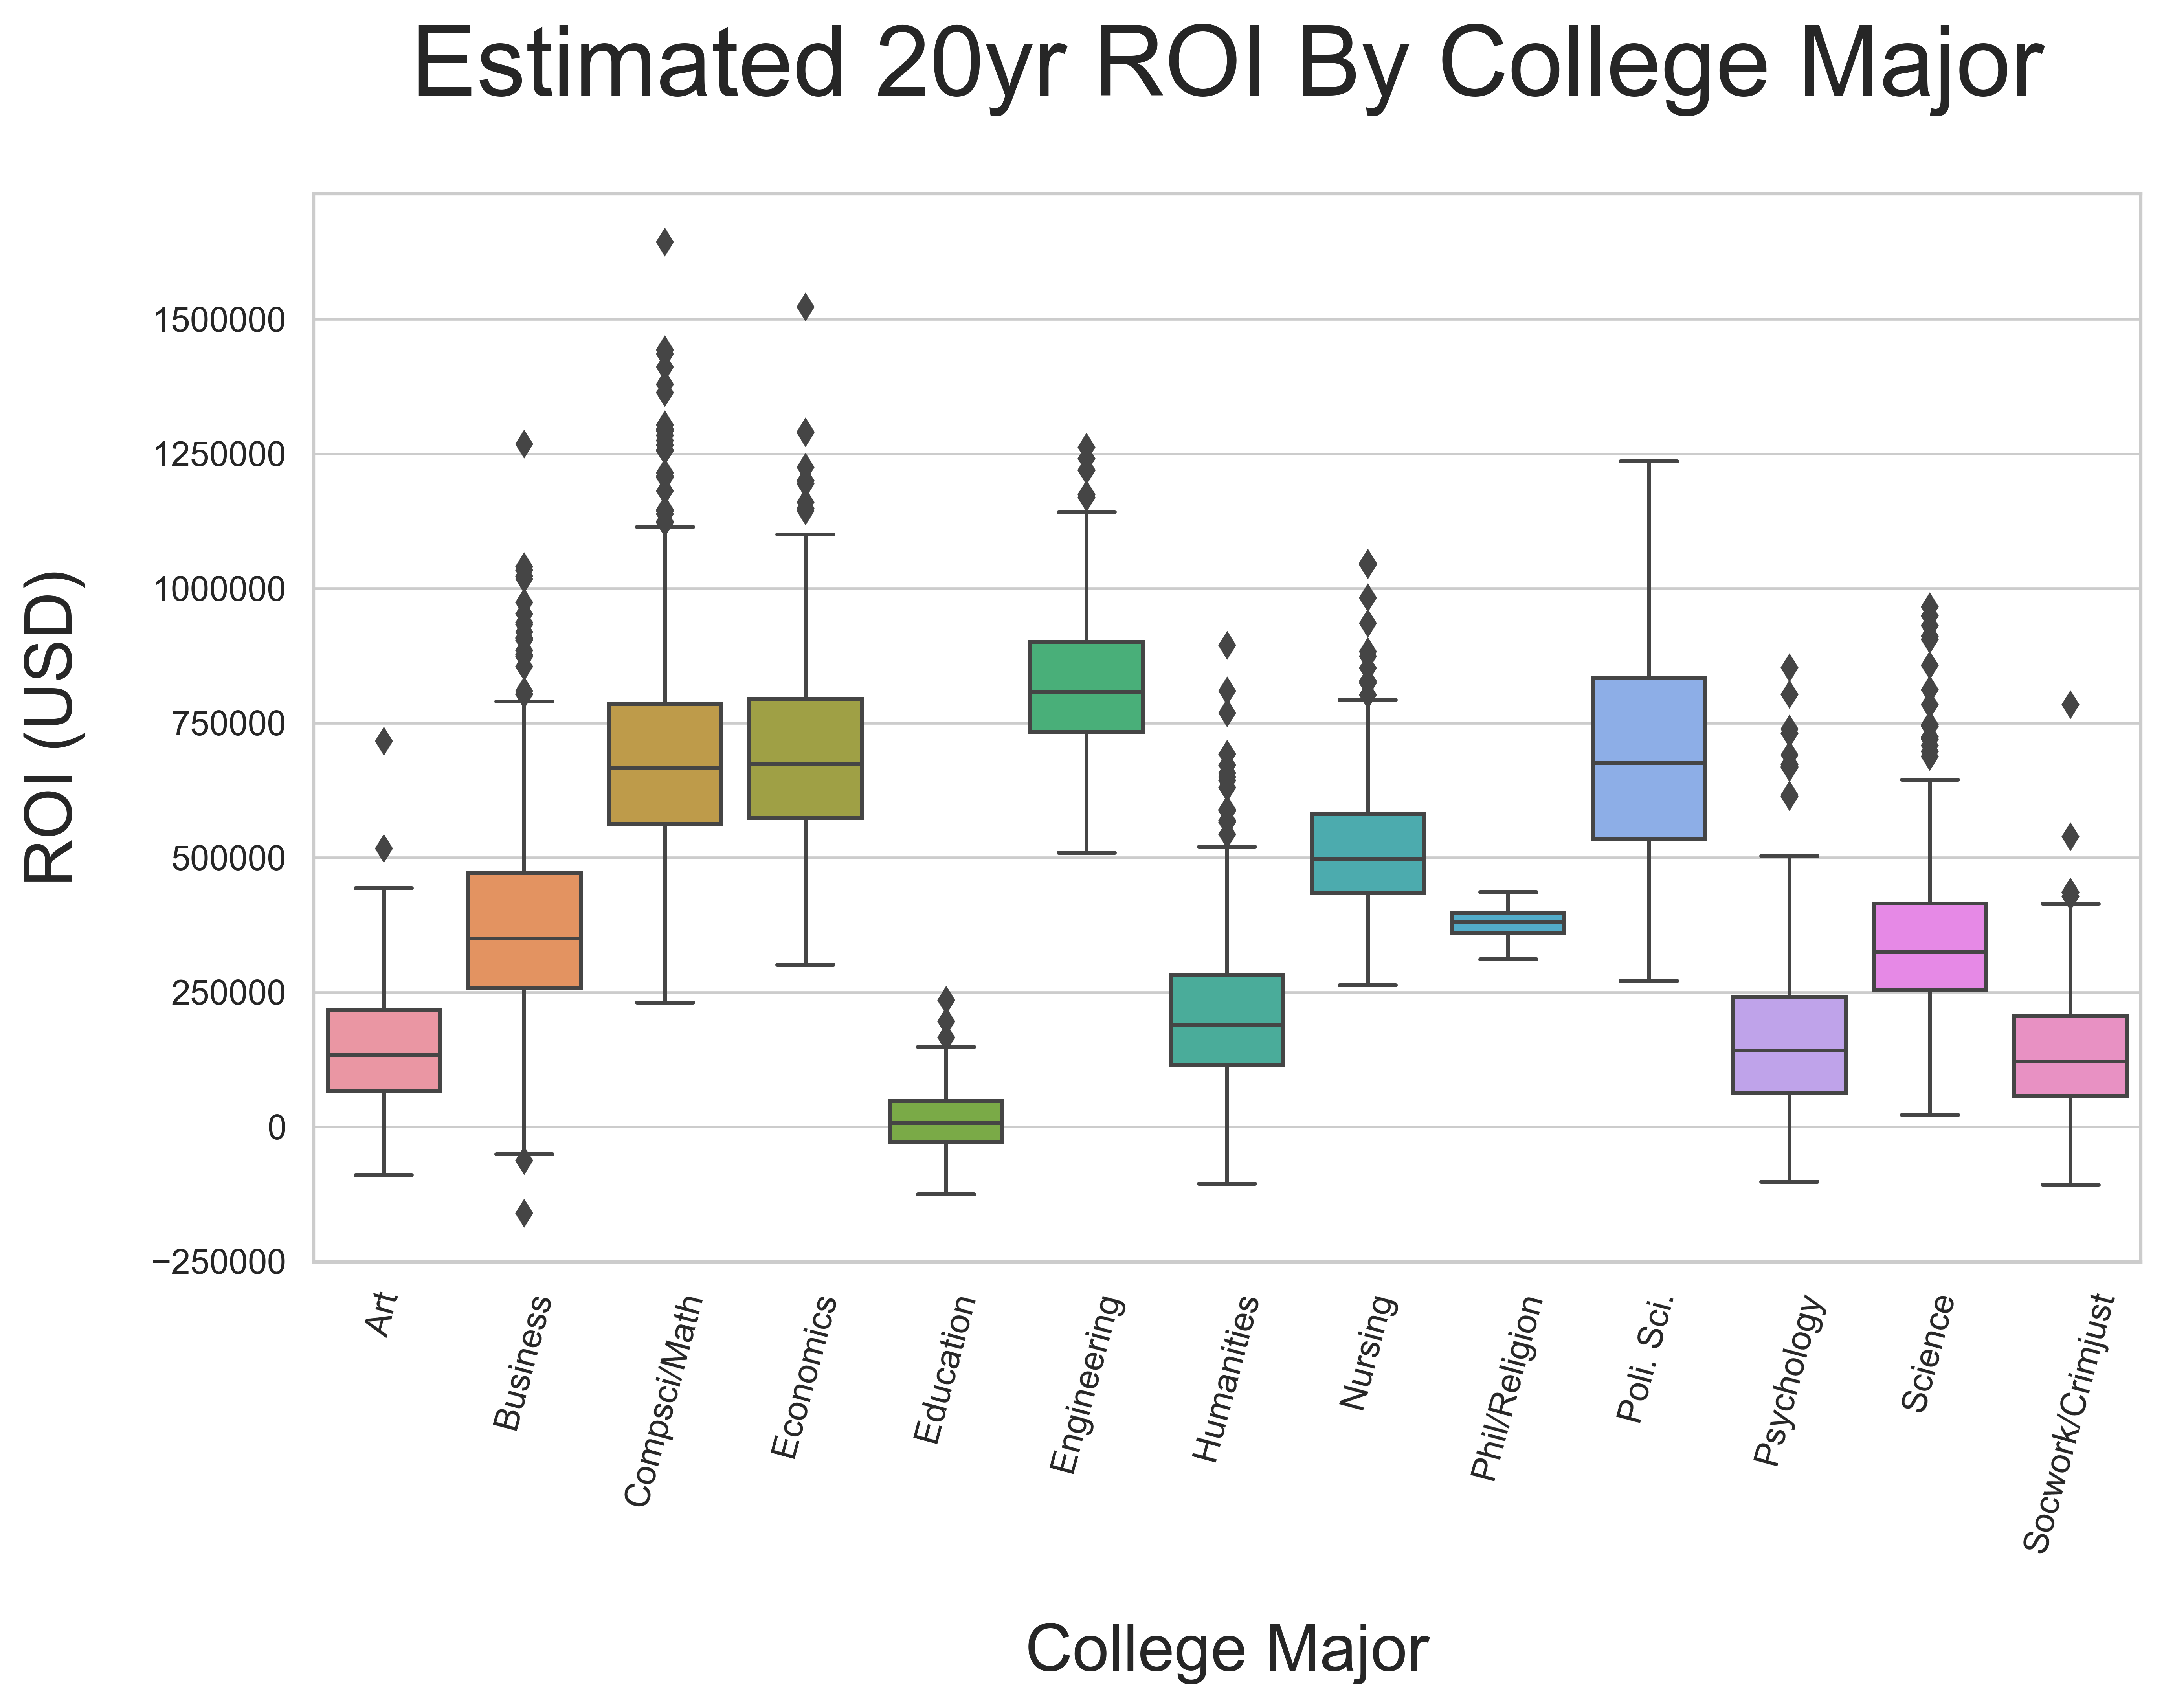

In [1092]:
#Set Figure Parameters
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi'] = 600
text_scaling=1.2
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=text_scaling) 

#Plot data
ax = sns.boxplot(x='Major', y='ROI',
                 data=format_major_df)
ax.set_xlabel('College Major', fontsize = 20, labelpad=20);
ax.set_ylabel('ROI (USD)', fontsize = 20, labelpad=20);
ax.set_title('Estimated 20yr ROI By College Major', fontsize = 30, pad = 30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# ax.set(ylim=(-250000, 250000))
        
#Save plot
plt.savefig('images/major_roi.tiff', bbox_inches = 'tight', pad_inches=.5)

**ANOVA statistics between major**

- NO WAY TO SAVE TUKEY'S PLOT, MUST DO MANUALLY

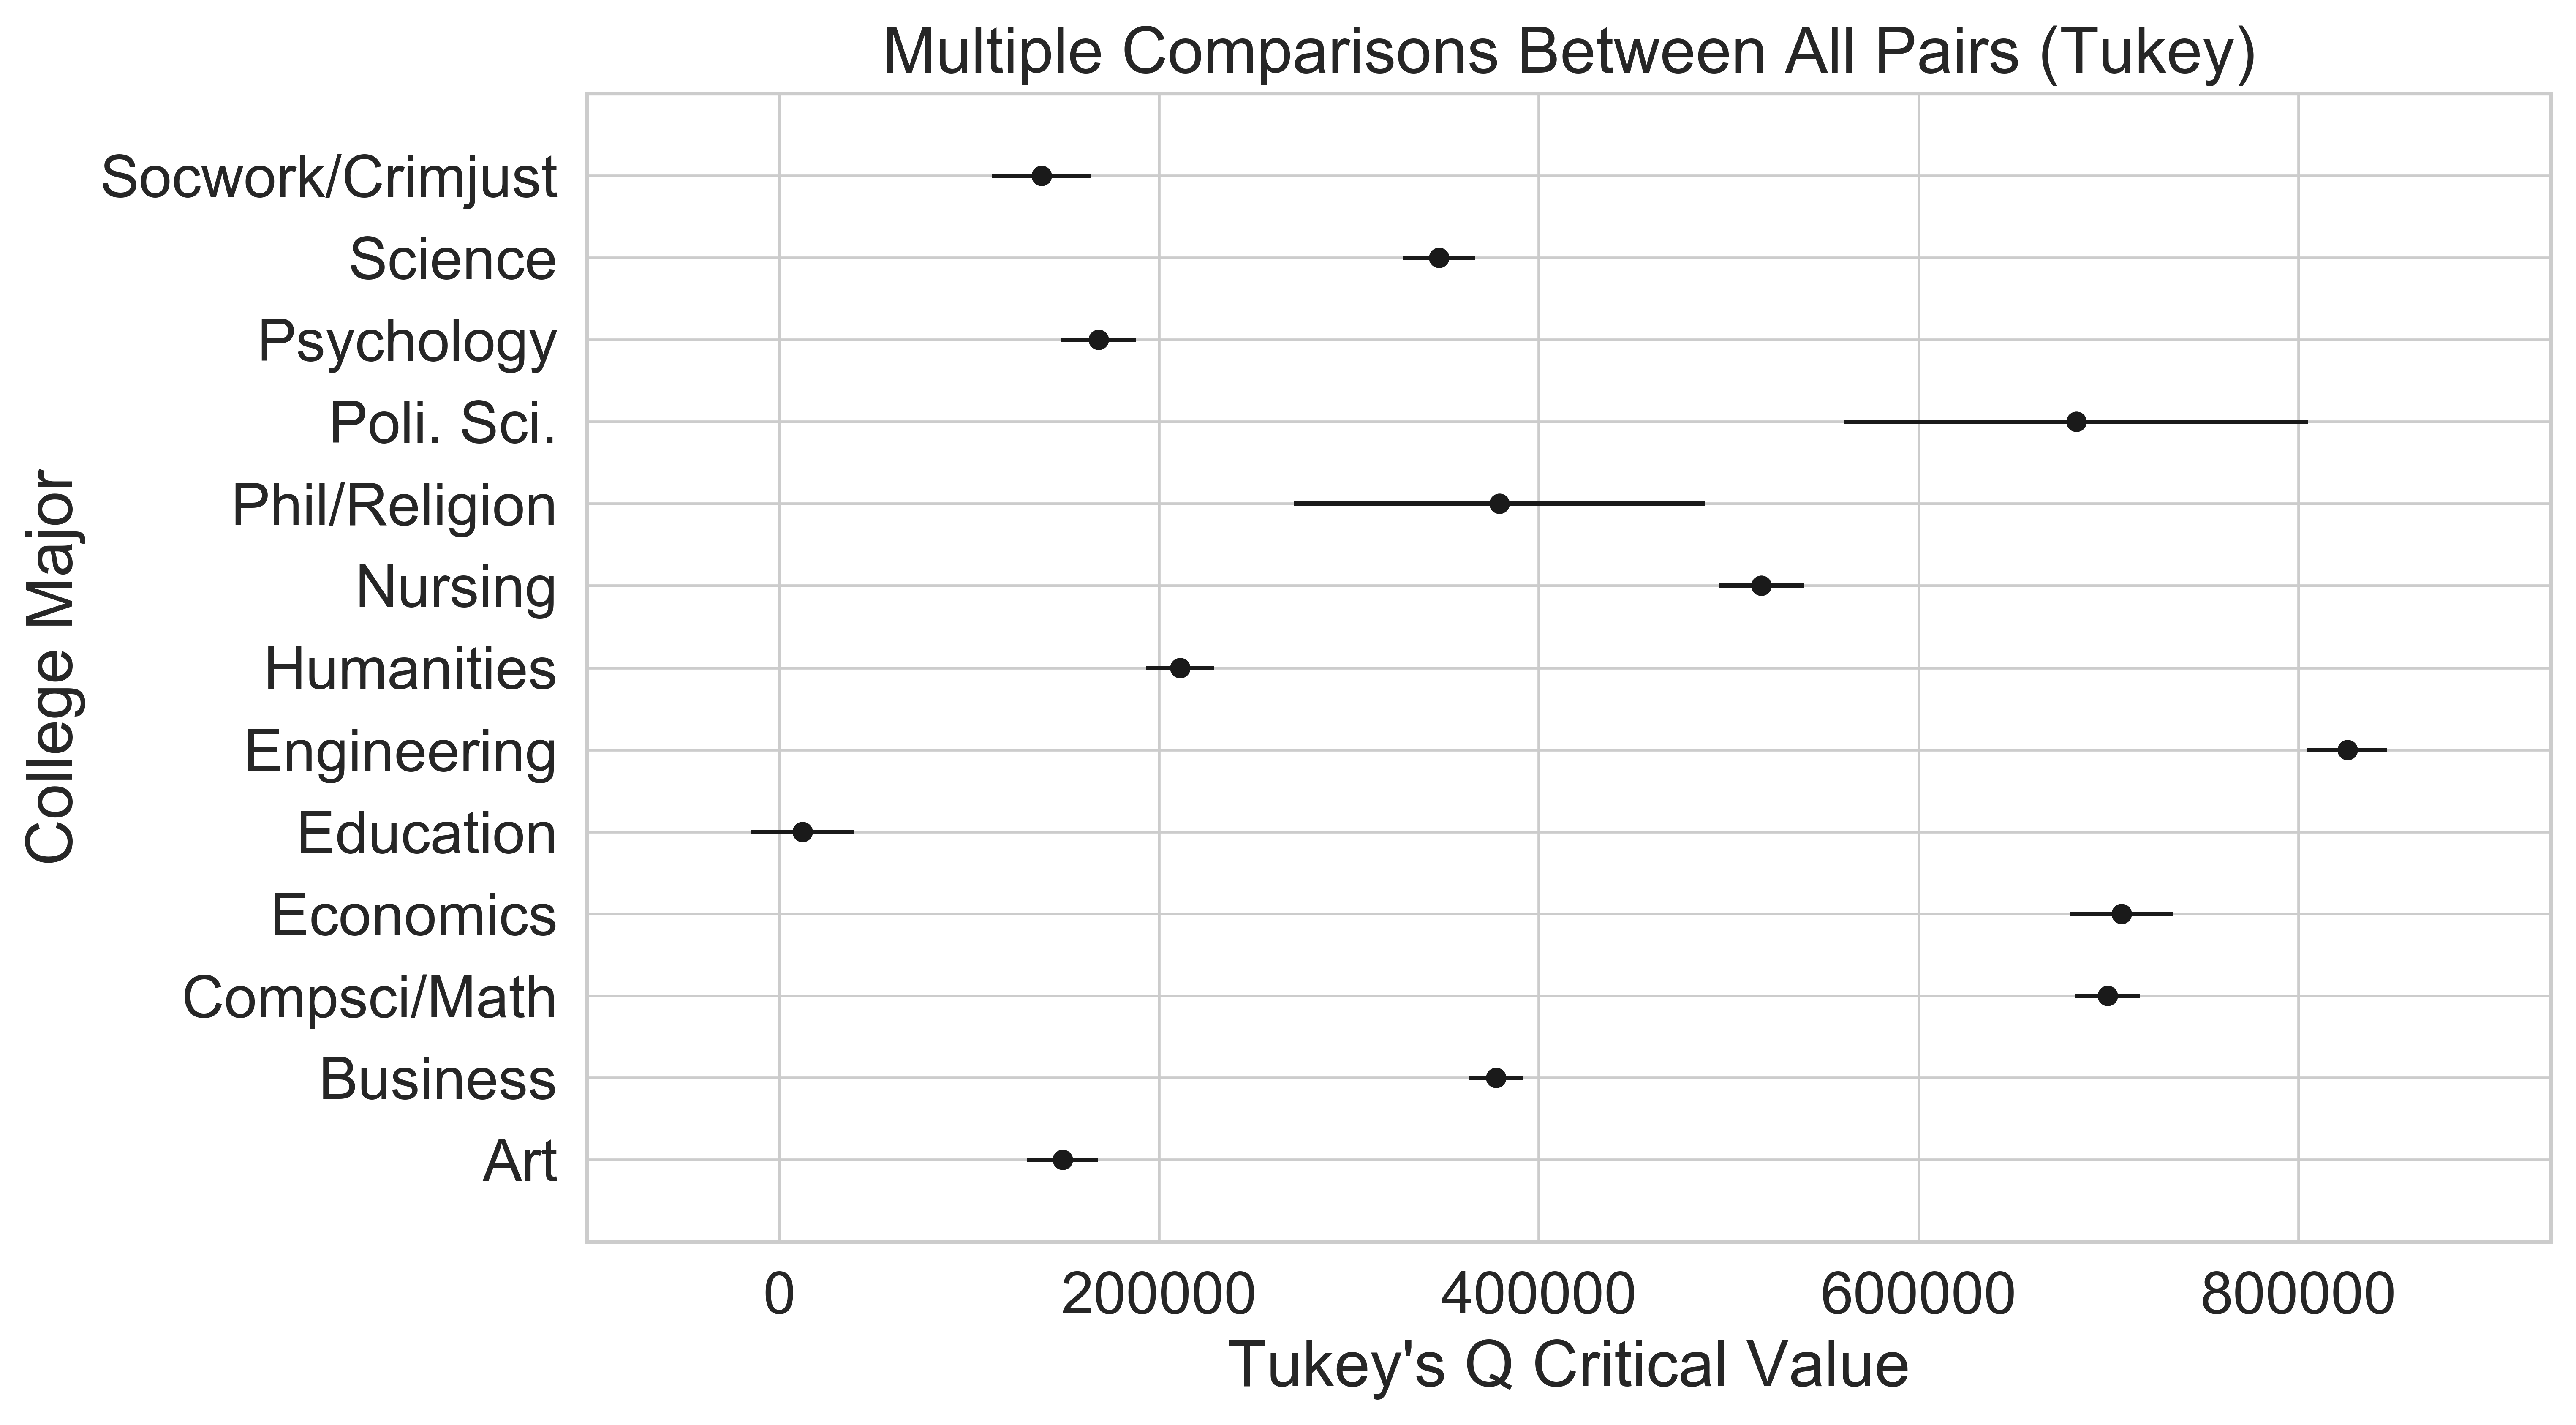

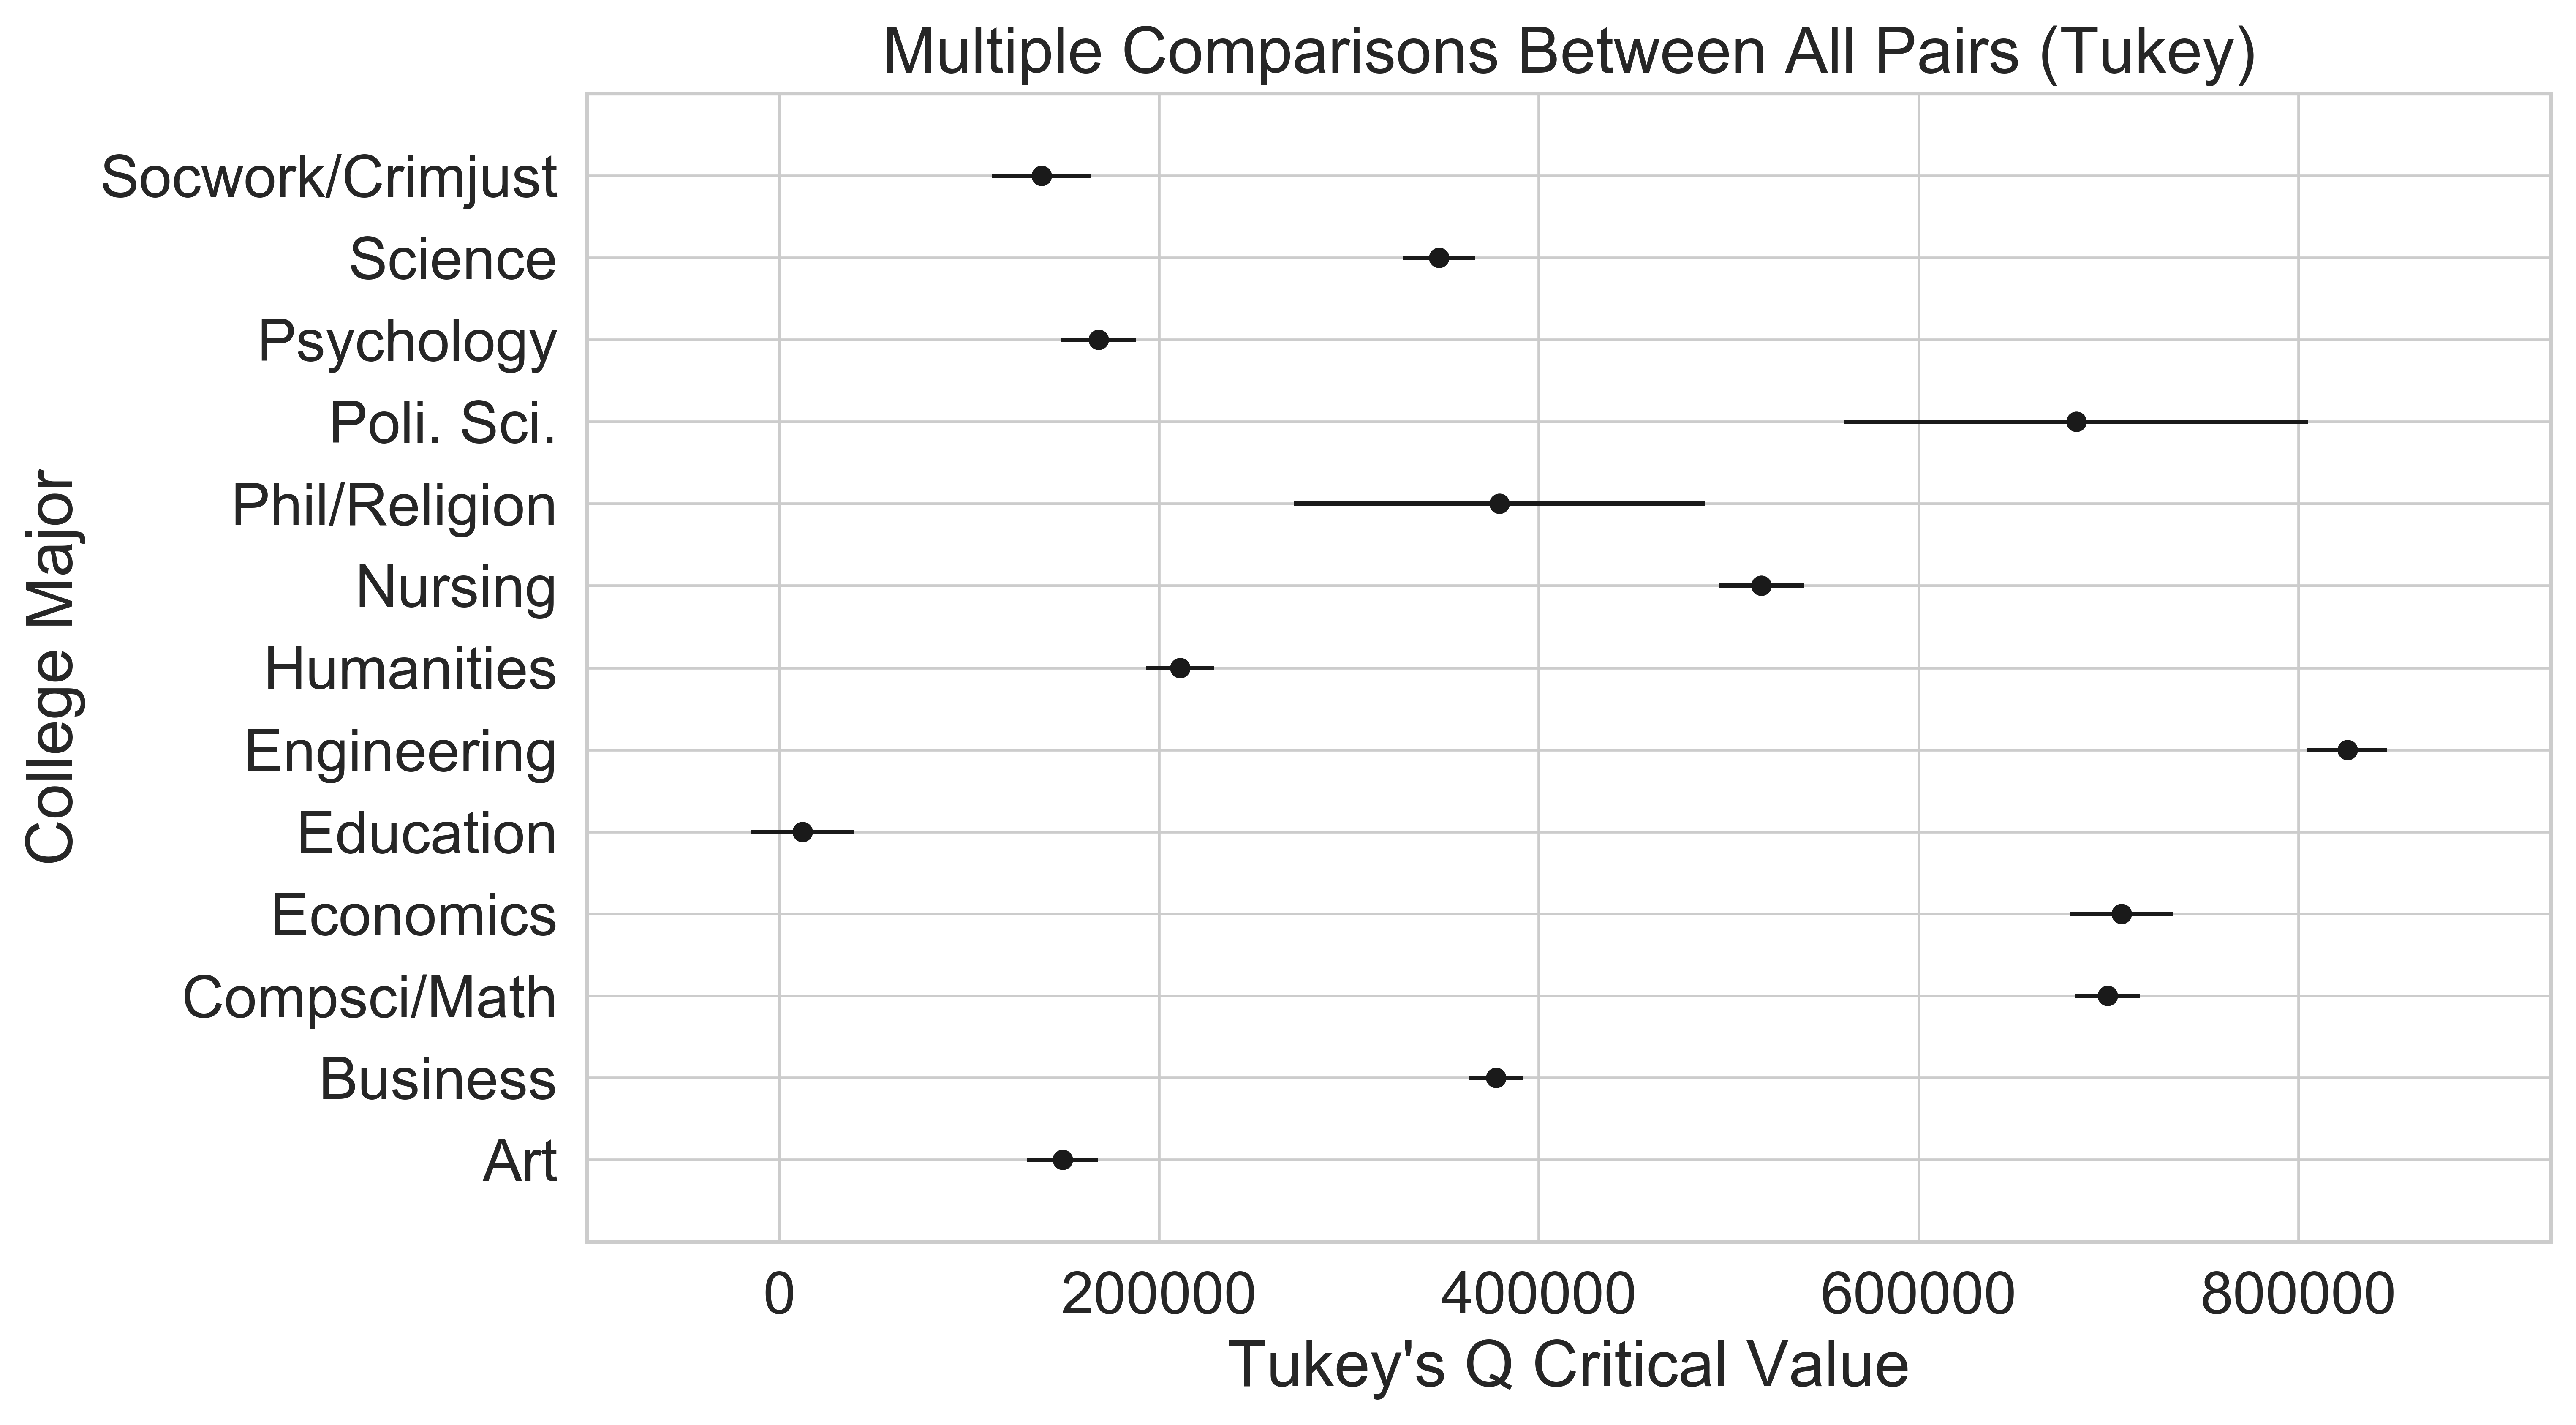

In [1104]:
#One-Way ANOVA
data = format_major_df
f, p = stats.f_oneway(data[data['Major'] == 'Art'].ROI,
                      data[data['Major'] == 'Business'].ROI,
                      data[data['Major'] == 'Compsci/Math'].ROI,
                      data[data['Major'] == 'Economics'].ROI,
                      data[data['Major'] == 'Education'].ROI,
                      data[data['Major'] == 'Engineering'].ROI,
                      data[data['Major'] == 'Humanities'].ROI,
                      data[data['Major'] == 'Nursing'].ROI,
                      data[data['Major'] == 'Phil/Religion'].ROI,
                      data[data['Major'] == 'Poli. Sci.'].ROI,
                      data[data['Major'] == 'Psychology'].ROI,
                      data[data['Major'] == 'Science'].ROI,
                      data[data['Major'] == 'Socwork/Crimjust'].ROI)

#TUKEY'S Post Hoc
from statsmodels.stats.multicomp import MultiComparison
major_comp = MultiComparison(data['ROI'], data['Major'])
results = major_comp.tukeyhsd()
results.plot_simultaneous(figsize=(10,6), xlabel="Tukey's Q Critical Value", ylabel='College Major')
#no way to save figure, must save manually


**Boxplot of Major Data By College Type**

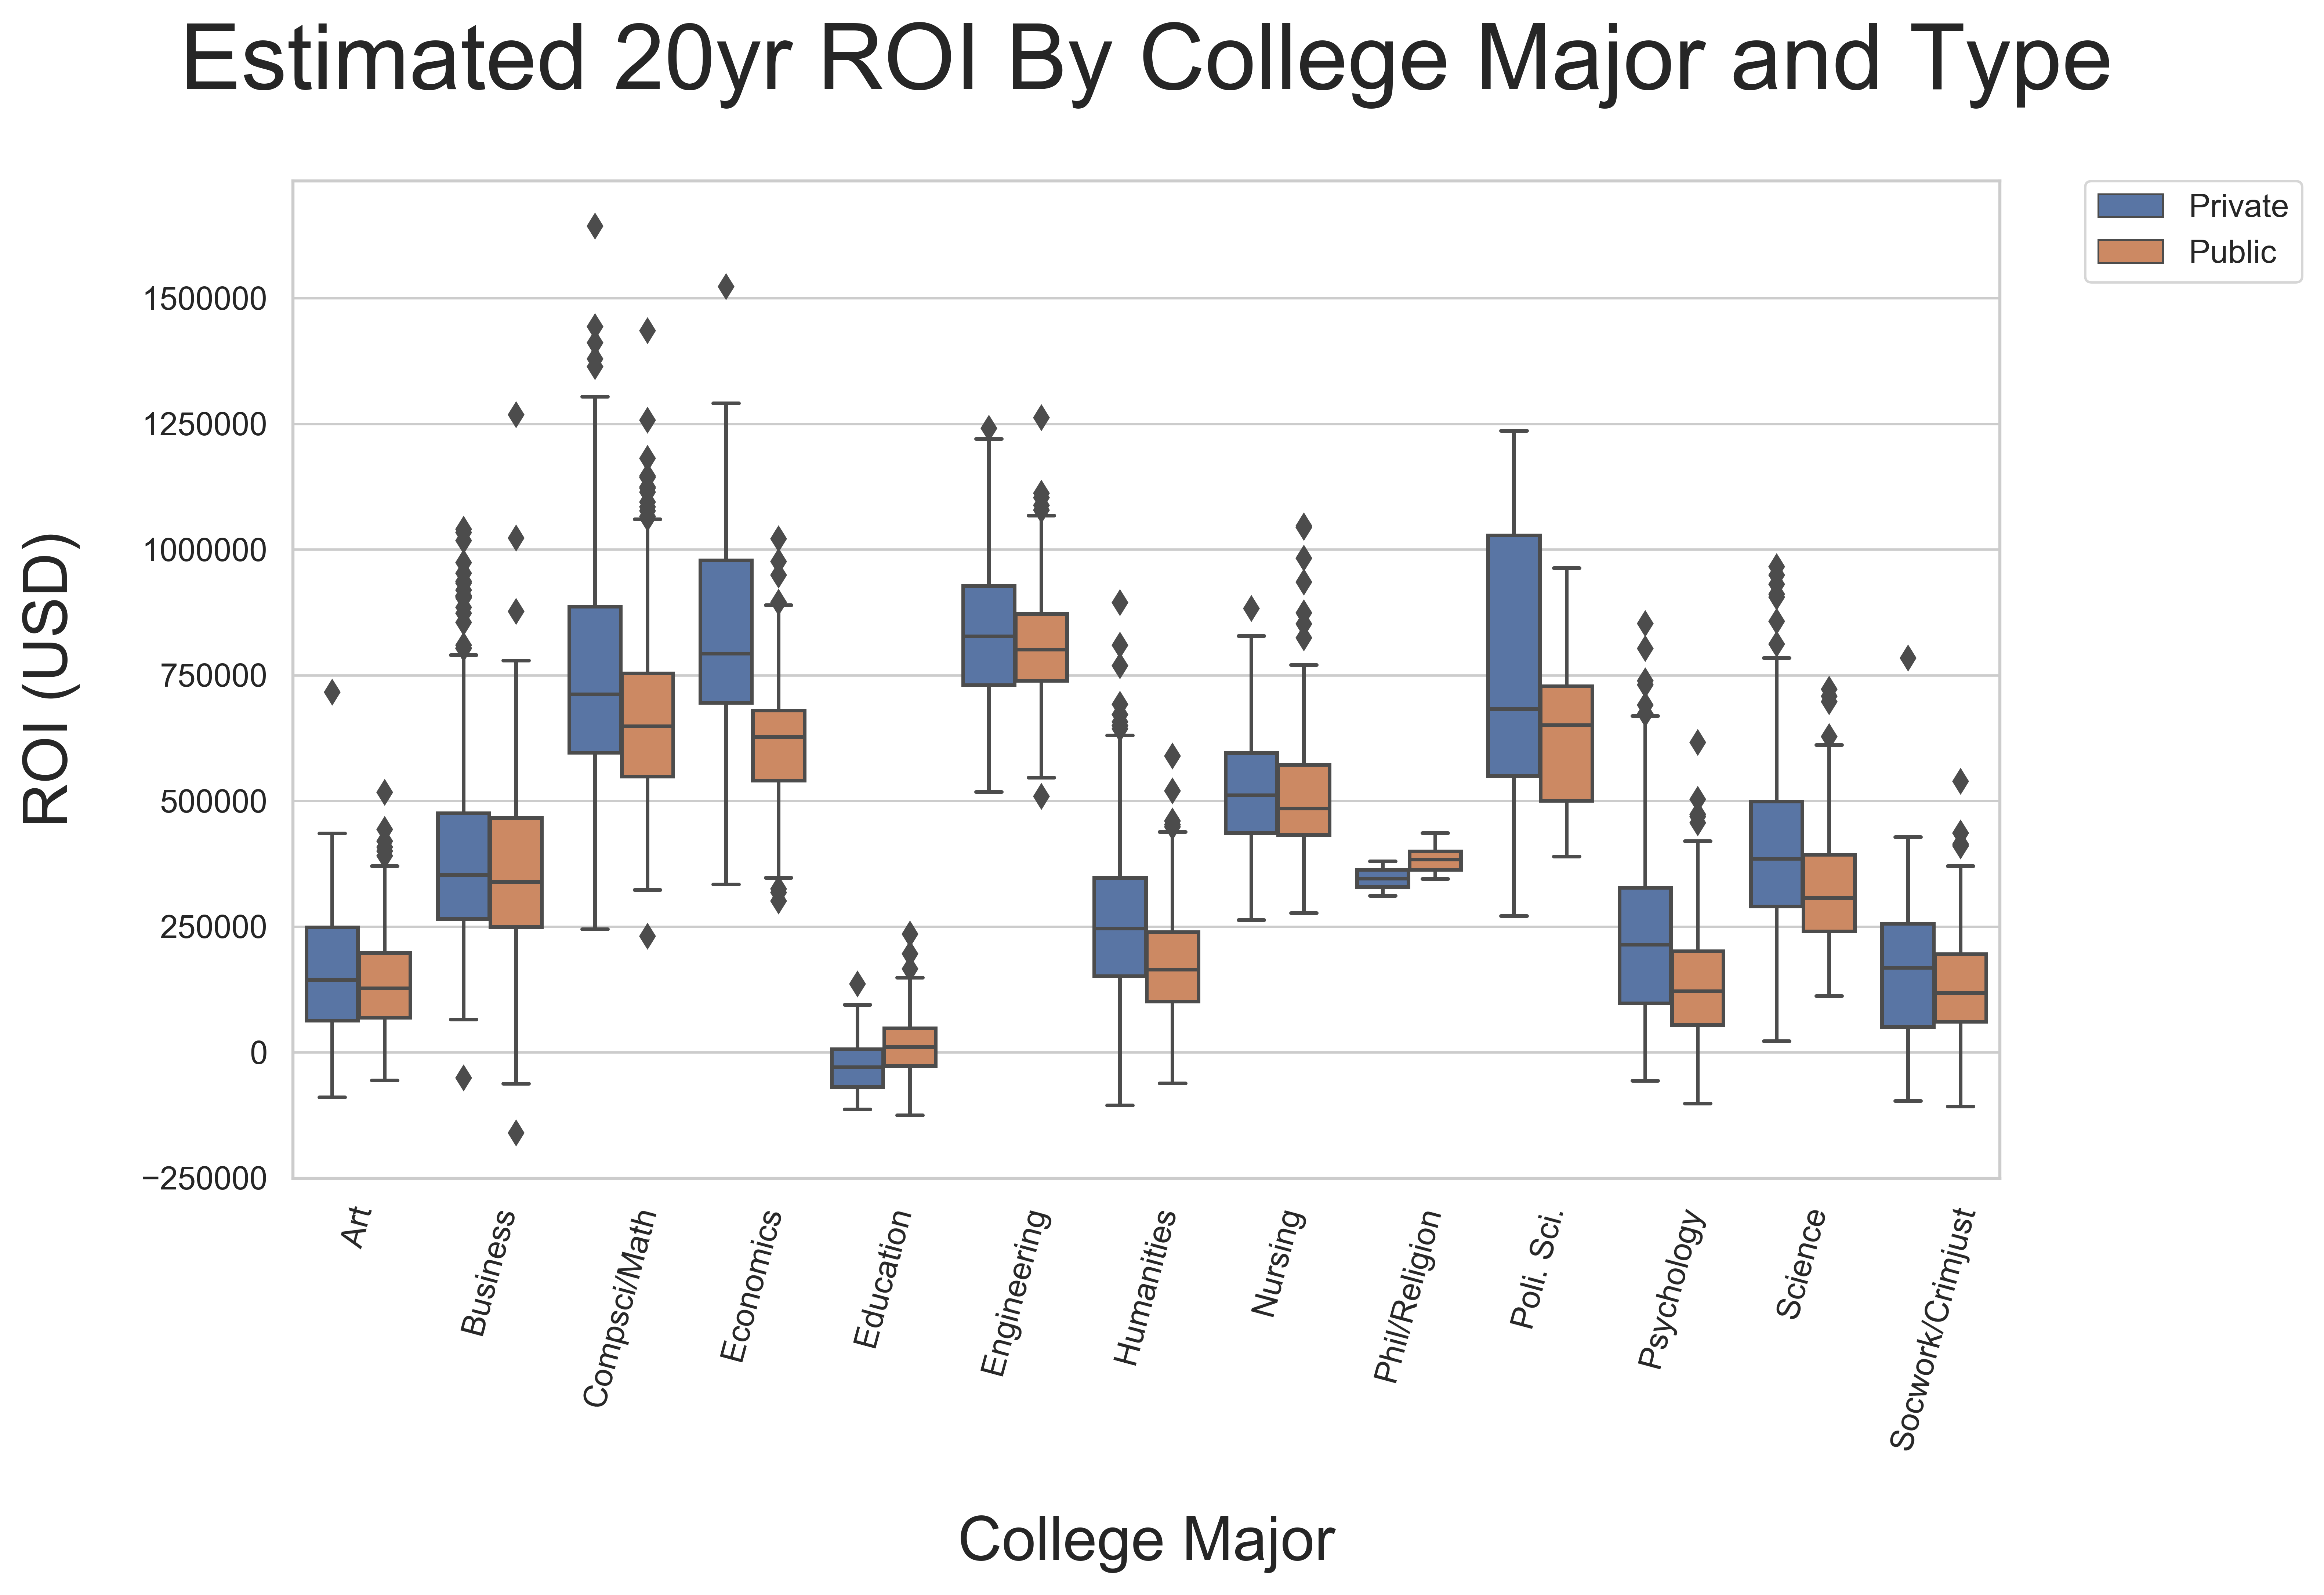

In [944]:
#Set Figure Parameters
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi'] = 600
text_scaling=1.2
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=text_scaling) 

#Plot data
ax = sns.boxplot(x='Major', y='ROI', hue='college_type',
                 data=format_major_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('College Major', fontsize = 20, labelpad=20);
ax.set_ylabel('ROI (USD)', fontsize = 20, labelpad=20);
ax.set_title('Estimated 20yr ROI By College Major and Type', fontsize = 30, pad = 30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
        
#Save plot
plt.savefig('images/major_collegetype_roi.tiff', bbox_inches = 'tight', pad_inches=.5)

**T-Test statistics between private and public ROI per major**

In [1109]:
major_list = list(format_major_df['Major'].unique())


repo_df = pd.DataFrame({'Major': [],\
                        'private_count':[],\
                        'public_count':[],\
                        'private_ROI_mean':[],\
                        'public_ROI_mean':[],\
                        'p_value': []})

for major in major_list:
    #Parse Data
    data_df = format_major_df.loc[ format_major_df['Major']==major ]
    private_ROI = data_df[ data_df['college_type']=='Private']['ROI']
    public_ROI = data_df[ data_df['college_type']=='Public']['ROI']
    
    #Determine count of colleges
    private_count = private_ROI.count()
    public_count = public_ROI.count()
    
    #Run T-Test if enough colleges
    if (private_count >= 5) & (public_count>=5):
        t, pval = stats.ttest_ind(private_ROI, public_ROI)
    else:
        pval = np.nan
        
    results_df = pd.DataFrame({'Major': [major],\
                        'private_count':[private_count],\
                        'public_count':[public_count],\
                        'private_ROI_mean': round(private_ROI.mean(), ndigits=1),\
                        'public_ROI_mean': round(public_ROI.mean(), ndigits=1),\
                        'p_value': [round(pval, ndigits=3)]})
    
    #Combine Results
    repo_df = pd.concat([repo_df, results_df], axis=0)



Major  private_count  public_count  private_ROI_mean  \
0               Art          162.0         257.0          160708.6   
0          Business          585.0         454.0          386115.4   
0      Compsci/Math          173.0         351.0          767422.0   
0         Economics           73.0         106.0          831657.5   
0         Education           10.0         170.0          -13630.0   
0       Engineering          105.0         207.0          846676.2   
0        Humanities          197.0         267.0          263016.2   
0           Nursing           84.0         187.0          527131.0   
0     Phil/Religion            2.0          14.0          345500.0   
0        Poli. Sci.            5.0           8.0          753600.0   
0        Psychology          110.0         255.0          241257.3   
0           Science          110.0         291.0          421656.4   
0  Socwork/Crimjust           26.0         173.0          177442.3   

   public_ROI_mean  p_value  
0         141967.7    0.095  
0         366030.8    0.060  
0         666039.9    0.000  
0         620934.0    0.000  
0          13689.4    0.151  
0         815251.2    0.049  
0         172636.3    0.000  
0         512657.8    0.378  
0         384071.4      NaN  
0         638875.0    0.488  
0         136627.1    0.000  
0         319189.0    0.000  
0         132068.2    0.079